# JOB MARKET FOR DATA FIELD

### OBJECTIVE :
1. What roles are companies hiring the most -
2. what skills sets are needed
3. The state that offer the most opportunity

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
df=pd.read_csv('alldata.csv')
print(df.shape)
print(df.columns)

(6964, 5)
Index(['position', 'company', 'description', 'reviews', 'location'], dtype='object')


In [3]:
df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [4]:
df.isna().sum() # checking for nulls

position         11
company          11
description      11
reviews        1638
location         11
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.drop(columns=["reviews"]) #drop the column reviews

,position,company,description,location
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,"Atlanta, GA"
5,Manager of Data Engineering,McKinsey & Company,Qualifications\nBachelor’s degree in Computer ...,"Atlanta, GA 30318"
6,"Product Specialist - Periscope, New Ventures",McKinsey & Company,Qualifications\nBachelor’s degree\n5-7 years o...,"Atlanta, GA 30318"
7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,Overview / Responsibilities\nWood Environment ...,"Atlanta, GA"
...,...,...,...,...
6959,Data Developer / Machine Learning Analyst,NetApp,Are you data-driven? We at NetApp believe in t...,"Sunnyvale, CA"
6960,Scientist I,"Pharmacyclics, an Abbvie Company",Pharmacyclics is committed to the development ...,"Sunnyvale, CA"
6961,Intern Scientist,Oath Inc,"Oath, a subsidiary of Verizon, is a values-led...","Sunnyvale, CA"
6962,Senior Data & Applied Scientist,Microsoft,We are the Bing Core Relevance team responsibl...,"Sunnyvale, CA"


In [7]:
df["position"].value_counts()

Data Scientist                                                                                        204
Senior Data Scientist                                                                                  53
Research Analyst                                                                                       44
Data Engineer                                                                                          39
Machine Learning Engineer                                                                              26
                                                                                                     ... 
Lead Health Economist                                                                                   1
Instagram - Software Engineer, Machine Learning                                                         1
Information Technology Specialist                                                                       1
Machine Learning Specialist - CSI / Azure - Cl

### LOCATIONS

In [8]:
df["location"].value_counts()

Seattle, WA                474
Cambridge, MA              368
New York, NY               338
Boston, MA                 305
San Francisco, CA          287
                          ... 
New York, NY 10004           1
San Francisco, CA 94117      1
Seattle, WA 98127            1
Los Angeles, CA 90012        1
Los Angeles, CA 90046        1
Name: location, Length: 328, dtype: int64

In [9]:
df[['state','code']] = df.location.str.split(',',expand=True)
df.head()

,position,company,description,reviews,location,state,code
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303",Atlanta,GA 30303
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA",Atlanta,GA
5,Manager of Data Engineering,McKinsey & Company,Qualifications\nBachelor’s degree in Computer ...,385.0,"Atlanta, GA 30318",Atlanta,GA 30318
6,"Product Specialist - Periscope, New Ventures",McKinsey & Company,Qualifications\nBachelor’s degree\n5-7 years o...,385.0,"Atlanta, GA 30318",Atlanta,GA 30318
7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,Overview / Responsibilities\nWood Environment ...,899.0,"Atlanta, GA",Atlanta,GA


**COMPANIES**

In [10]:
total_no_company=df['company'].nunique()
print('total number of companies offerinf Data jobs:',total_no_company)

total number of companies offerinf Data jobs: 1302


THE COMPANIES WITH OPEN VACANCIES

In [11]:
most_vacancy= df.groupby(['company'])['position'].count()
most_vacancy=most_vacancy.sort_values(ascending=False)
most_vacancy=most_vacancy.reset_index()
vacancy=most_vacancy.head(25)
vacancy

,company,position
0,Amazon.com,357
1,Ball Aerospace,187
2,Microsoft,137
3,Google,134
4,NYU Langone Health,76
5,Fred Hutchinson Cancer Research Center,70
6,KPMG,66
7,Broad Institute,49
8,Facebook,49
9,Walmart eCommerce,45


# Building a dataframe for the qualification and tools required

### DATAFRAME 1 : Qualification

In [12]:
qualifications = ['B.Sc', 'M.Sc','Bachelors','Masters','PhD']

counts= []
for qualification in qualifications:
    Q=len(df[df['description'].str.contains(qualification)])
    counts.append(Q)
print(counts)

[6, 17, 155, 322, 1270]


**Converting Into DataFrame**

In [13]:
Q=pd.DataFrame(list(zip(qualifications, counts)),columns=['Qualification','Counts'])
Q #the df for the qualifications

,Qualification,Counts
0,B.Sc,6
1,M.Sc,17
2,Bachelors,155
3,Masters,322
4,PhD,1270


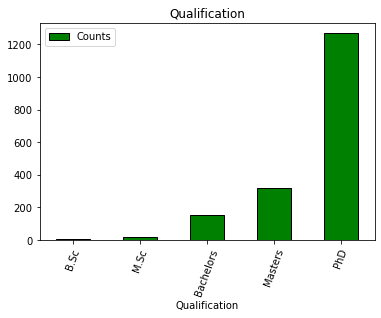

In [14]:
import matplotlib.pyplot as plot
Q.plot.bar(x="Qualification", y="Counts", rot=70, title="Qualification",edgecolor='black', color='green');

### DATAFRAME 2 : Tools

### FOR loop to get the count on the tools

### METHOD 1

In [15]:
tools = ['Python','git','R','SQL','Tensor','Keras','Docker','Cloud','AWS','Tableau','Periscope','Sisense','Spark','kafta','Hive','Hadoop']

counts= []
for tool in tools:
    ctools=len(df[df['description'].str.contains(tool)])
    counts.append(ctools)
print(counts)

[2021, 799, 5071, 1448, 279, 79, 106, 353, 456, 392, 14, 0, 728, 0, 410, 739]


In [16]:
T=pd.DataFrame(list(zip(tools, counts)),columns=['Tools','Counts'])
T.head() #the df for the tools used 

,Tools,Counts
0,Python,2021
1,git,799
2,R,5071
3,SQL,1448
4,Tensor,279


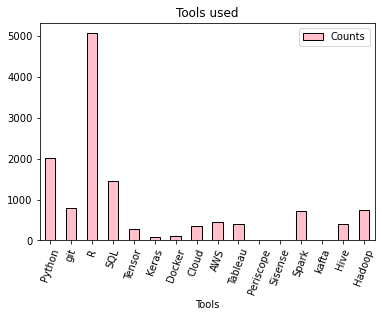

In [17]:
import matplotlib.pyplot as plot
T.plot.bar(x="Tools", y="Counts", rot=70, title="Tools used",edgecolor='black', color='pink');

## DATA SCIENTIST

In [18]:
df=df[df['position'].str.contains("Data Scientist")]
df.head()

,position,company,description,reviews,location,state,code
9,Senior Associate - Cognitive Data Scientist Na...,KPMG,Known for being a great place to work and buil...,4494.0,"Atlanta, GA 30338",Atlanta,GA 30338
12,"Senior Associate, Data Scientist",KPMG,Innovate. Collaborate. Shine. Lighthouse — KPM...,4494.0,"Atlanta, GA 30338",Atlanta,GA 30338
15,Data Scientist,Cotiviti,Cotiviti is looking for an industry leading Da...,104.0,"Atlanta, GA",Atlanta,GA
22,Data Scientist,Norfolk Southern Corp,Join a growing Data Science and Advanced Analy...,722.0,"Atlanta, GA 30309",Atlanta,GA 30309
24,"Data Scientist, Keying & Linking",Equifax,Job Number: 16614\nPosition Title:\nExternal D...,447.0,"Atlanta, GA",Atlanta,GA


**COMPANIES**

In [19]:
total_no_company=df['company'].nunique()
print('total number of companies offerinf Data jobs:',total_no_company)

total number of companies offerinf Data jobs: 460


In [20]:
most_vacancy= df.groupby(['company'])['position'].count()
most_vacancy=most_vacancy.sort_values(ascending=False)
most_vacancy=most_vacancy.reset_index()
vacancy=most_vacancy.head(25)
vacancy

,company,position
0,KPMG,52
1,Amazon.com,26
2,Google,16
3,JP Morgan Chase,11
4,Allstate,10
5,Microsoft,10
6,Facebook,10
7,Jobspring Partners,10
8,Capital One,8
9,Nielsen,8


**State offering positions for Data Scientist**

In [21]:
S=df['state'].value_counts().loc[lambda x: x>5].reset_index()
S.head(5)

,index,state
0,New York,199
1,San Francisco,131
2,Chicago,69
3,Seattle,64
4,Boston,60


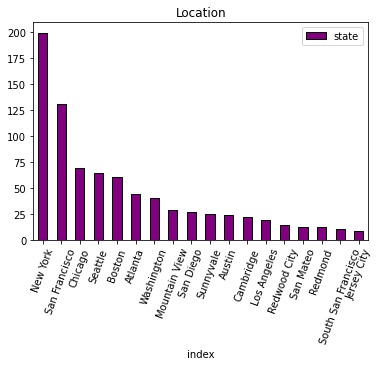

In [22]:
import matplotlib.pyplot as plot
S.plot.bar(x="index", y="state", rot=70, title="Location",edgecolor='black', color='purple');

**CONCLUSION**

Most of the Data Scientist roles are around New york , SFO and Chicago

**QUALIFICATION**

In [23]:
qualifications = ['B.Sc', 'M.Sc','Bachelors','Masters','PhD']

counts= []
for qualification in qualifications:
    Q=len(df[df['description'].str.contains(qualification)])
    counts.append(Q)
print(counts)

[0, 3, 16, 85, 310]


In [24]:
Q=pd.DataFrame(list(zip(qualifications, counts)),columns=['Qualification','Counts'])
Q

,Qualification,Counts
0,B.Sc,0
1,M.Sc,3
2,Bachelors,16
3,Masters,85
4,PhD,310


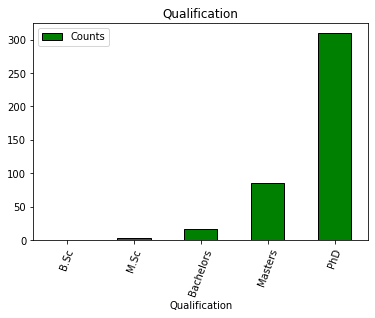

In [25]:
import matplotlib.pyplot as plot
Q.plot.bar(x="Qualification", y="Counts", rot=70, title="Qualification",edgecolor='black', color='green');

**CONCLUSION** : The Role of Data Scientist requires  Phd

    
|Qualification  | percentage |
| -----------   | -----------|
| PHD           | 74.9 %     |
| Masters       | 20.53 %    |
| Bacherlors    | 3.8 %      |
| M.Sc          | 0.7 %      |
| B.Sc          | 0 %        |

**TOOLS**

In [26]:
tools = ['Python','git','R','SQL','Tensor','Keras','Docker','Cloud','AWS','Tableau','Periscope','Sisense','Spark','kafta','Hive','Hadoop']

counts= []
for tool in tools:
    ctools=len(df[df['description'].str.contains(tool)])
    counts.append(ctools)
print(counts)

[671, 194, 845, 524, 99, 44, 14, 66, 103, 152, 6, 0, 306, 0, 210, 310]


In [27]:
T=pd.DataFrame(list(zip(tools, counts)),columns=['Tools','Counts'])
T.head()

,Tools,Counts
0,Python,671
1,git,194
2,R,845
3,SQL,524
4,Tensor,99


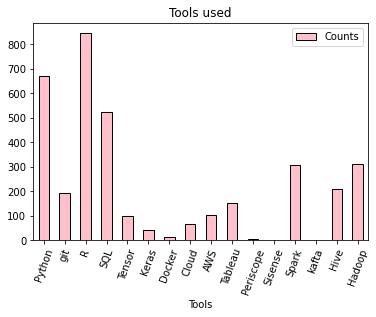

In [28]:
import matplotlib.pyplot as plot
T.plot.bar(x="Tools", y="Counts", rot=70, title="Tools used",edgecolor='black', color='pink');

**CONCLUSION**

The Tool fairly required for Data Scientist is Python, R and Sql

### DATA ENGINEER

In [29]:
df=df[df['position'].str.contains("Data Engineer")]
print(len(df))

3


### DATA ANALYST

In [30]:
df=df[df['position'].str.contains("Data Analyst")]
print(len(df))

0
